# KMeans ,GMM and PCA

The Dataset used for this assignment is the Wine dataset from UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Wine) <br>
Number of Instances: 178<br>
Missing values: NA<br>
Number of Attributes: 13<br>
Attribute Information:<br>
1) Alcohol<br>
2) Malic acid<br>
3) Ash<br>
4) Alcalinity of ash<br>
5) Magnesium<br>
6) Total phenols<br>
7) Flavanoids<br>
8) Nonflavanoid phenols<br>
9) Proanthocyanins<br>
10) Color intensity<br>
11) Hue<br>
12) OD280/OD315 of diluted wines<br>
13) Proline<br>

#### Import the necessary libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from scipy.spatial.distance import cdist
from pandas.plotting import scatter_matrix as sm
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
import warnings
warnings.filterwarnings('ignore')

In [54]:
df=pd.read_csv('wine.data', names = ['Label', 'Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',\
                                     'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280','Proline'])
label = df['Label']  #True values
del df['Label']
df.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [55]:
df.dtypes

Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [57]:
# Overall statistics
df.describe()

Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [58]:
#checking for missing values
df.isna().any().any()

False

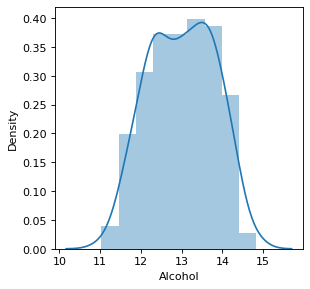

In [59]:
#Distribution of the column – Alcohol
data = df['Alcohol']
sns.distplot(data)
plt.show()

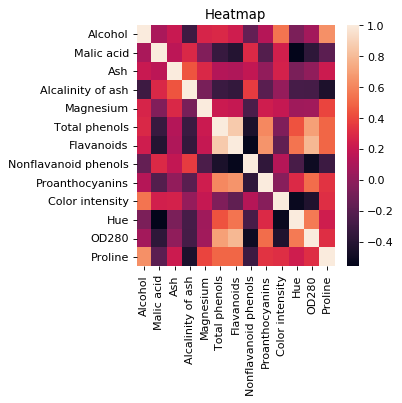

In [60]:
#Heatmap
plt.rcParams["figure.dpi"] = 80
plt.rcParams["figure.figsize"] = (4, 4)
sns.heatmap(df.corr())
plt.title("Heatmap")
plt.show()

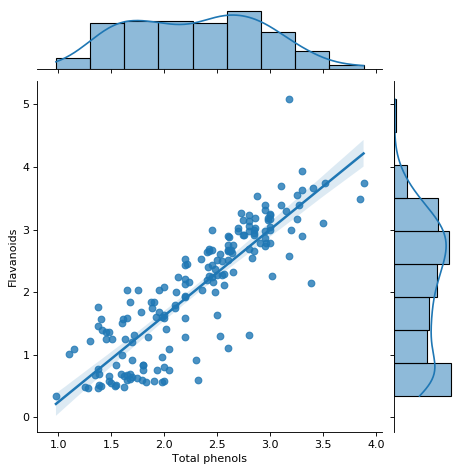

In [61]:
sns.jointplot(x=df.columns[5], y=df.columns[6], data=df, kind="reg");
plt.show()

#### Standardize the feature vectors

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_features=sc.fit_transform(df)
wine_scaled = pd.DataFrame(scaled_features, columns = df.columns)
wine_scaled.head()

Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   Color intensity       Hue     OD280   Proline  
0         0.251717  0.362177  1.847920  1.013009  
1        -0.293321  0.406051  1.113449  0.965242  
2         0.269020  0.318304  0.788587  1.395148  
3         1.186068 -0.427544  1.184071  2.334574  
4        -0.319276  0.362177  0.449601 -0.037874

#### Find the number of clusters

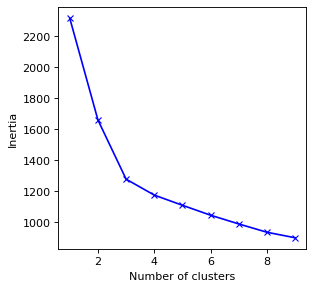

In [63]:
#elbow method
sse = {}  #empty
for k in range(1, 10):  #iteration
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(wine_scaled)
    sse[k] = kmeans.inertia_  #inertia is the sum of the squared distances of the samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

#### So we can infer that the number of clusters will be 3. Another method of finding the number of cluster is by using Silhouette Score Method

#### Silhouette Score Method

For n_clusters = 2 Average Silhouette Score: 0.2683134097105213


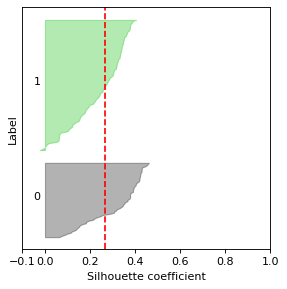

For n_clusters = 3 Average Silhouette Score: 0.28594199657074876


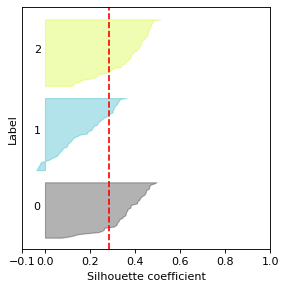

For n_clusters = 4 Average Silhouette Score: 0.25173343011696475


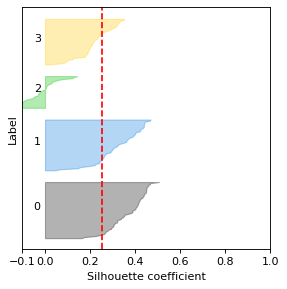

For n_clusters = 5 Average Silhouette Score: 0.23187479572412723


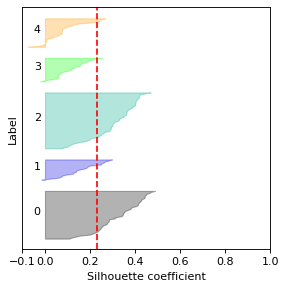

For n_clusters = 6 Average Silhouette Score: 0.23964277899912415


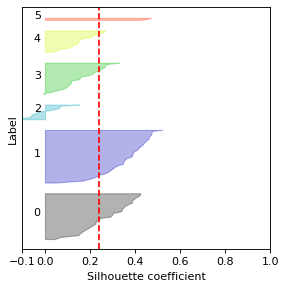

For n_clusters = 7 Average Silhouette Score: 0.1977124515910614


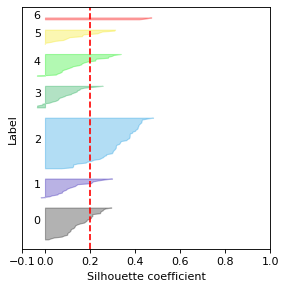

For n_clusters = 8 Average Silhouette Score: 0.133114891253478


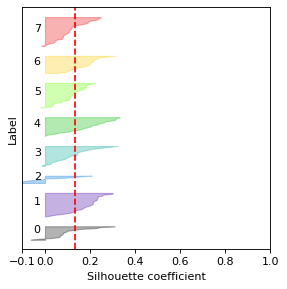

For n_clusters = 9 Average Silhouette Score: 0.14035373736325835


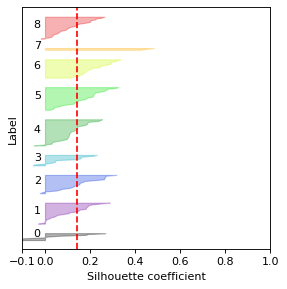

For n_clusters = 10 Average Silhouette Score: 0.14398677296462006


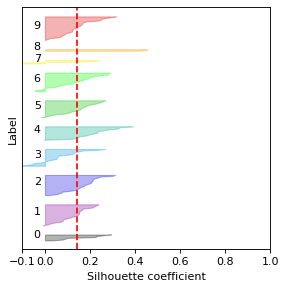

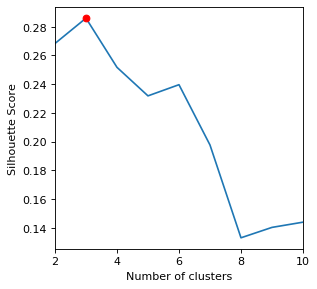

In [64]:
# Silhouette Score Method
import matplotlib.cm as cm
r = range(2,11)
ds = dict()

for i in r:
    kmean = KMeans(n_clusters = i,random_state=0)
    result = kmean.fit_predict(wine_scaled)
    a = silhouette_score(wine_scaled,result)
    print("For n_clusters =", i,"Average Silhouette Score:", a) 
    ds[i] = a
    s = silhouette_samples(wine_scaled,result)  #computation
    y1 = 10
    fig, ax = plt.subplots()
    ax.set_xlim([-0.1, 1])   #range
    ax.set_ylim([0, wine_scaled.shape[0] + (i + 1) * 10])
    
    for j in range(i):
        sil_val = s[result== j]
        sil_val.sort()
        cluster_size = sil_val.shape[0]
        y2 = y1 + cluster_size
        c = cm.nipy_spectral(float(j) / i)
        ax.fill_betweenx(np.arange(y1, y2),0, sil_val, facecolor=c, edgecolor=c, alpha=0.3)
        ax.text(-0.05, y1 + 0.5 * cluster_size, str(j))
        y1 = y2 + 10 
        
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Label")
    ax.axvline(x=a, color="red", linestyle="--")
    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()
    
d1 = pd.Series(ds)
ax = d1.plot()
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(3,d1[3],'ro')

#### So we can infer that the number of clusters will be 3.

## Kmeans clustering algorithm

In [65]:
KM = KMeans(n_clusters = 3, random_state=0)
result = KM.fit_predict(wine_scaled)
inertia = KM.inertia_
labels = KM.labels_
centroids= KM.cluster_centers_
print("The Labels are:",labels)
print("Centroids:",centroids)
print("The Shape of the centroid is: ",centroids.shape)
print("Inertia:",inertia)

The Labels are: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Centroids: [[ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.93900326 -0.39196582 -0.43920097  0.20898793 -0.46377382 -0.05334831
   0.06690377 -0.01982215  0.06479192 -0.88207529  0.45298189  0.28973833
  -0.75602559]
 [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
   0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
   1.15834713]]
The Shape of the centroid is:  (3, 13)
Inertia: 1278.7607763668143


# GMM

In [66]:
GMM = GaussianMixture(n_components = 3, random_state=0)
result = GMM.fit(wine_scaled)
mean = GMM.means_
wt = GMM.weights_
labels2 = GMM.predict(wine_scaled)
print("The Labels are:",labels)
print("Weights:",wt)
print("Means:",mean)

The Labels are: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Weights: [0.28632025 0.3580442  0.35563555]
Means: [[ 0.16516987  0.87143373  0.18784666  0.52521419 -0.07462282 -0.97928753
  -1.21559036  0.72599751 -0.77948503  0.94259045 -1.16489416 -1.29279595
  -0.4065956 ]
 [-0.94194964 -0.36665974 -0.39337021  0.25121283 -0.57289459 -0.03349368
   0.08136144  0.01323491  0.00779434 -0.88476972  0.43434413  0.29281555
  -0.78131234]
 [ 0.81535193 -0.33244352  0.2448001  -0.67576135  0.63685313  0.82213961
   0.89675273 -0.59782121  0.61971204  0.13188764  0.50056412  0.74602428
   1.11395195]]


# PCA

In [67]:
pca = PCA(random_state=0)
pca.fit(wine_scaled)
arr = pca.transform(wine_scaled)
pca1 = pd.DataFrame(arr)
var_ratio = pca.explained_variance_ratio_
val = pca.singular_values_
print("Head:",pca1.head())
print("Variance ratio:",var_ratio)
print("Singular Value:",val)

Head:          0         1         2         3         4         5         6   \
0  3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1  2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2  2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3  3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4  1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   

         7         8         9         10        11        12  
0  0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  
1  1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  
2 -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  
3  0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  
4  0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364  
Variance ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.007952

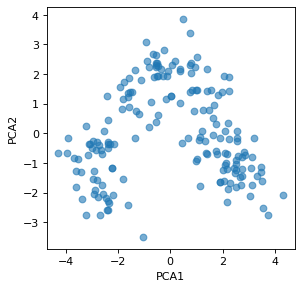

In [68]:
pca = PCA(n_components=2, random_state=0)
pca.fit(wine_scaled)
arr = pca.transform(wine_scaled)
pca1 = pd.DataFrame(arr)
plt.scatter(x=pca1.iloc[:,0], y=pca1.iloc[:,1], alpha = 0.6)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

### Visualize KMeans

In [69]:
def gmm_ellipse_draw_pca(position, covariance, ax=None, **kwargs):
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def kmeans_plot_pca(kmeans, X, n_clusters, rseed=2, ax=None):
    dot_size = 50
    cmap = 'plasma'
    labels = kmeans.fit_predict(X)
    fig, ax = plt.subplots(figsize=(9,7))    
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1],
               c=labels, s=dot_size, cmap=cmap, zorder=2)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i], [center]).max() 
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC',edgecolor='slategrey', lw=4, alpha=0.5, zorder=1))
    return          

        
def gmm_plot_pca(gmm, X, label=True, ax=None):
    dot_size = 50
    cmap = 'plasma'
    fig, ax = plt.subplots(figsize=(9,7))      
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=dot_size, cmap=cmap, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=dot_size, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        gmm_ellipse_draw_pca(pos, covar, ax=ax, alpha=w * w_factor)

Text(0, 0.5, 'PCA2')

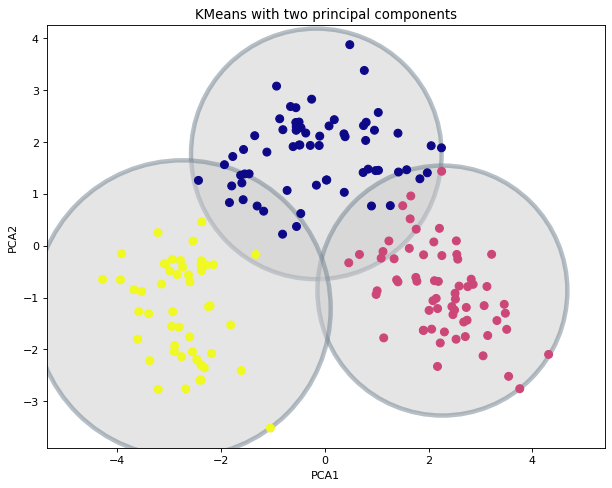

In [70]:
KM = KMeans(n_clusters = 3, random_state=0)
result = KM.fit(pca1)
label1 = KM.predict(pca1)
kmeans_plot_pca(KM, pca1.as_matrix(),n_clusters=3)
plt.title('KMeans with two principal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

### Visualize GMM - full covariance matrix with PCA

Text(0, 0.5, 'PCA2')

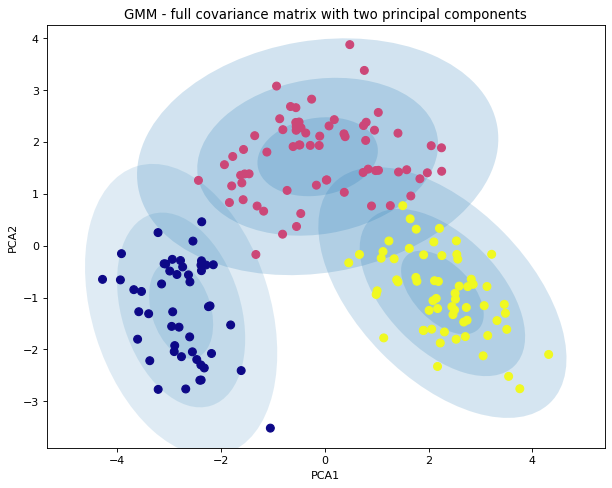

In [71]:
GMM = GaussianMixture(n_components = 3,covariance_type='full', random_state=0)
result = GMM.fit(pca1)
label2 = GMM.predict(pca1)
gmm_plot_pca(GMM, pca1.as_matrix())
plt.title('GMM - full covariance matrix with two principal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

### Visualize GMM - diagonal covariance matrix with PCA

Text(0, 0.5, 'PCA2')

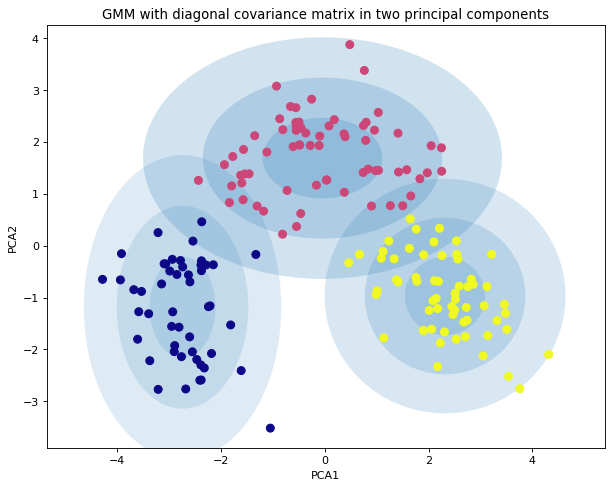

In [72]:
GMM = GaussianMixture(n_components = 3,covariance_type='diag', random_state=0)
result = GMM.fit(pca1)
label3 = GMM.predict(pca1)
gmm_plot_pca(GMM, pca1.as_matrix())
plt.title('GMM with diagonal covariance matrix in two principal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

### Visualize GMM - tied covariance matrix with PCA

Text(0, 0.5, 'PCA2')

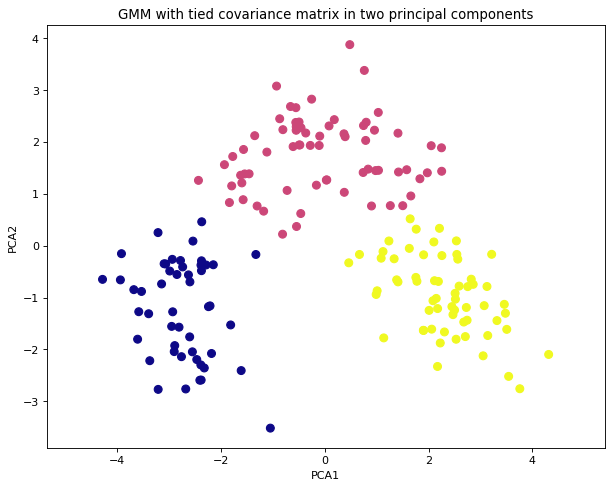

In [73]:
GMM = GaussianMixture(n_components = 3,covariance_type='tied', random_state=0)
result = GMM.fit(pca1)
label4 = GMM.predict(pca1)
gmm_plot_pca(GMM, pca1.as_matrix())
plt.title('GMM with tied covariance matrix in two principal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

#### For KMeans without PCA:

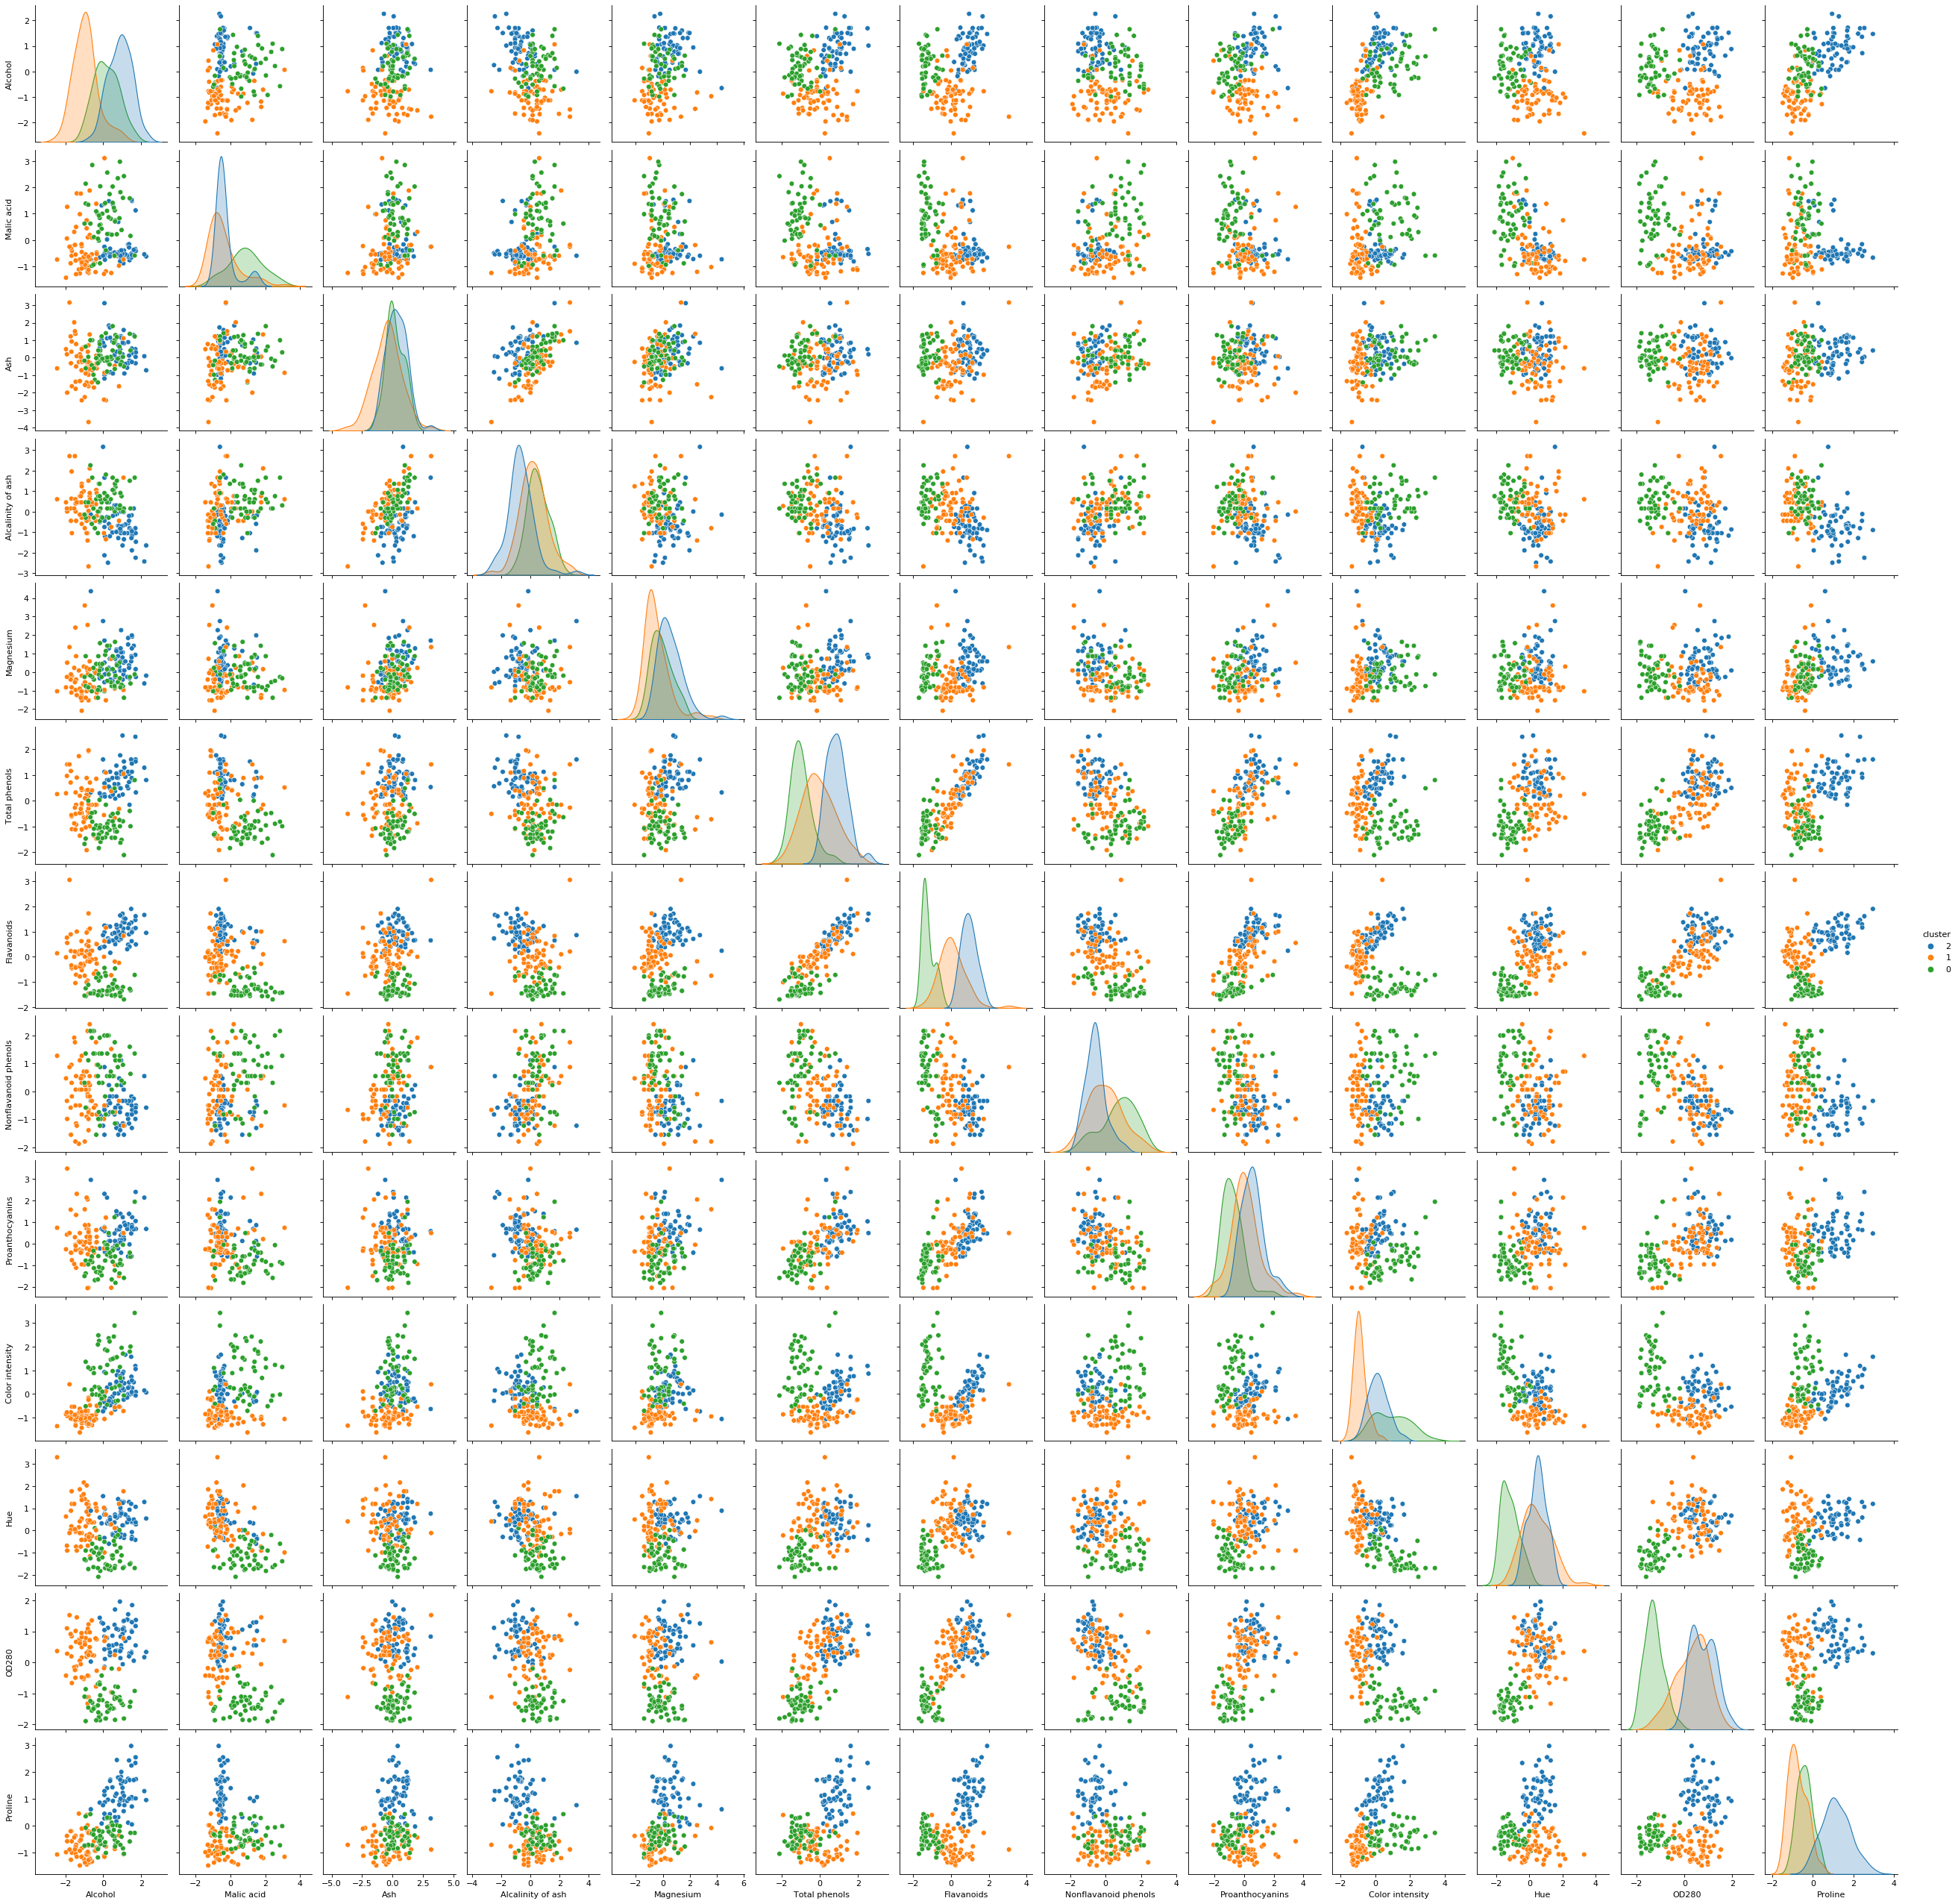

In [74]:
wine_scaled['cluster'] = labels.astype(str)
sns_plot = sns.pairplot(wine_scaled, hue = "cluster")

#### For KMeans with PCA:

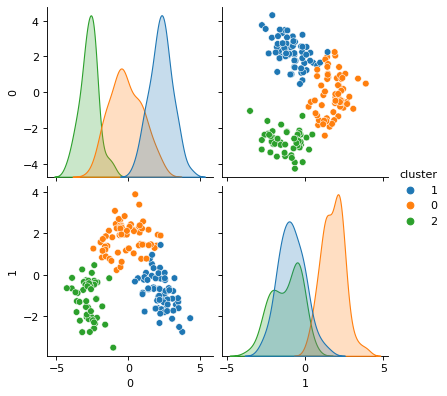

In [75]:
pca1['cluster'] = label1.astype(str)
sns_plot = sns.pairplot(pca1, hue = "cluster")

#### GMM without PCA:

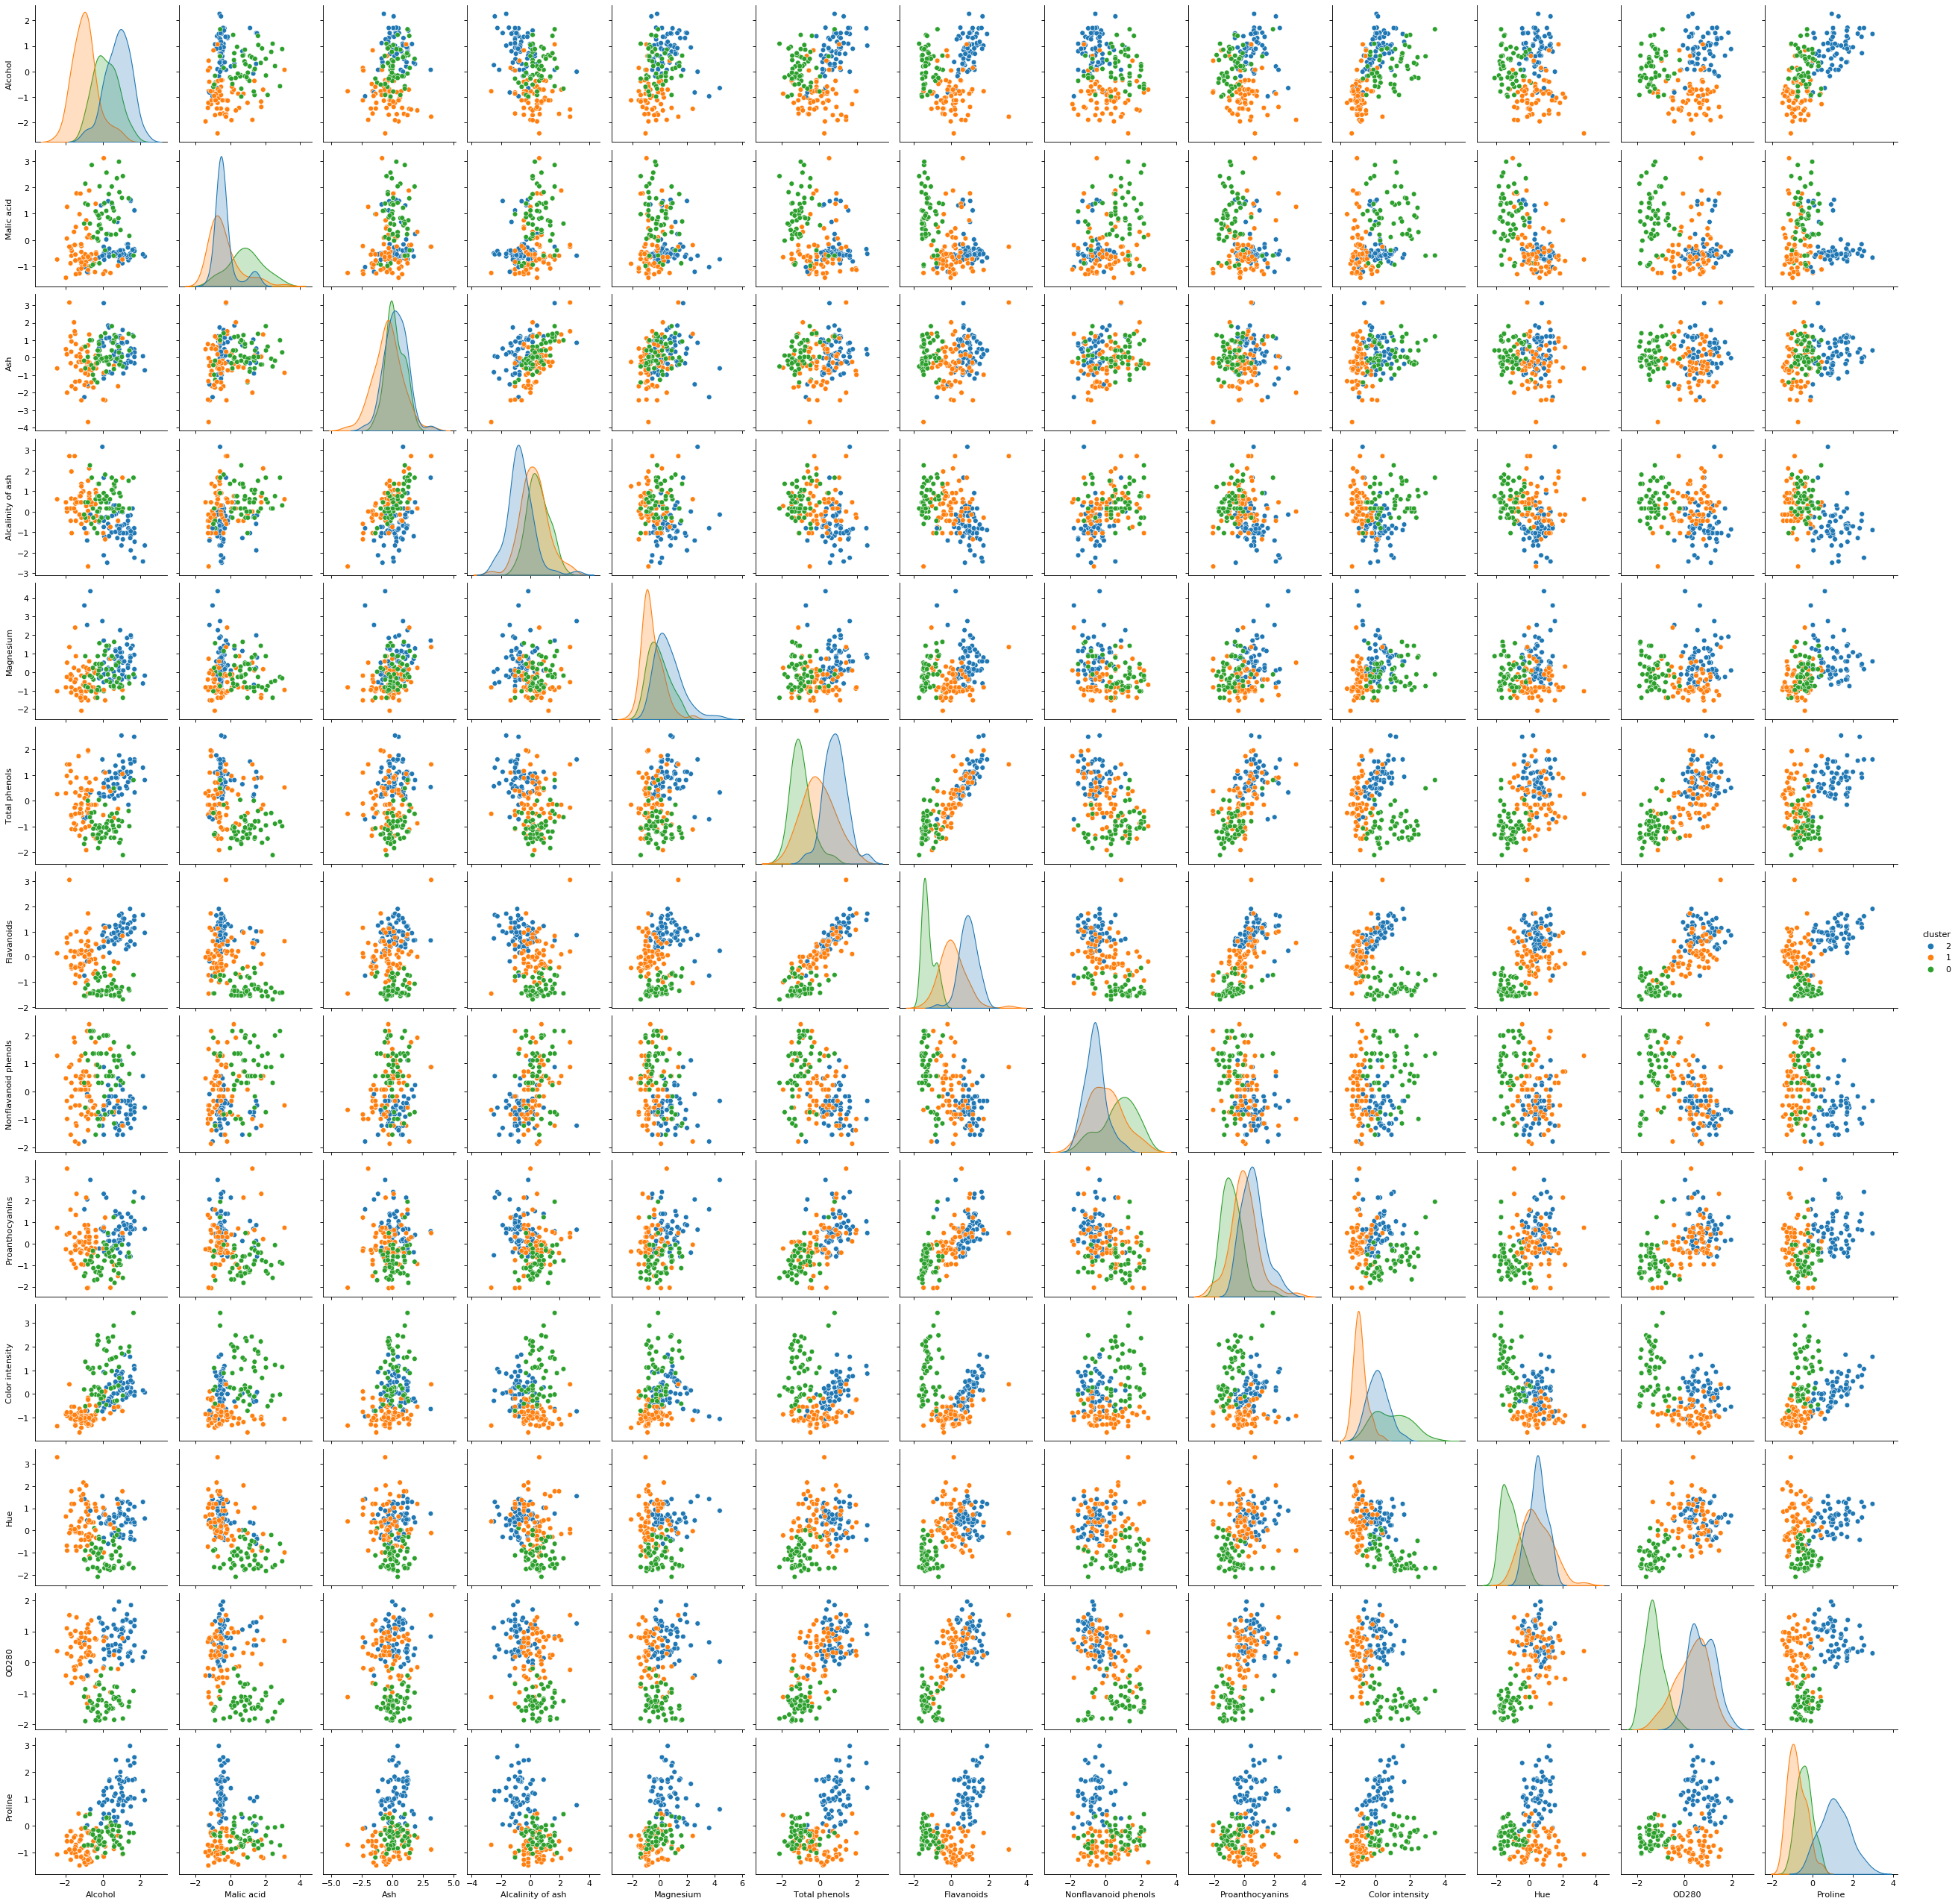

In [76]:
wine_scaled['cluster'] = labels2.astype(str)
sns_plot = sns.pairplot(wine_scaled, hue = "cluster")

#### GMM - full covaiance matrix with PCA:

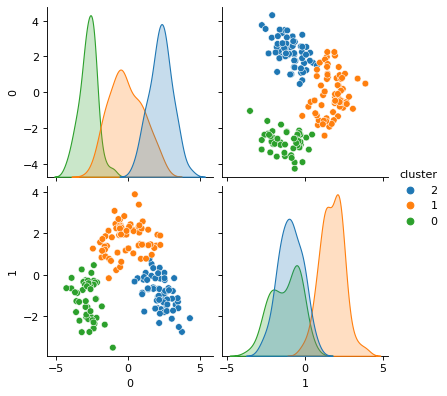

In [77]:
pca1['cluster'] = label2.astype(str)
sns_plot = sns.pairplot(pca1, hue = "cluster")

#### For GMM - diagonal covaiance matrix with PCA:

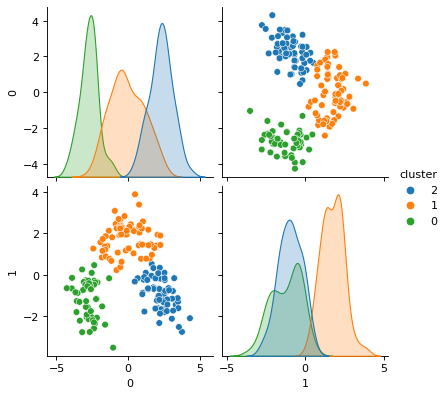

In [78]:
pca1['cluster'] = label3.astype(str)
sns_plot = sns.pairplot(pca1, hue = "cluster")

#### For GMM - tied covaiance matrix with PCA:

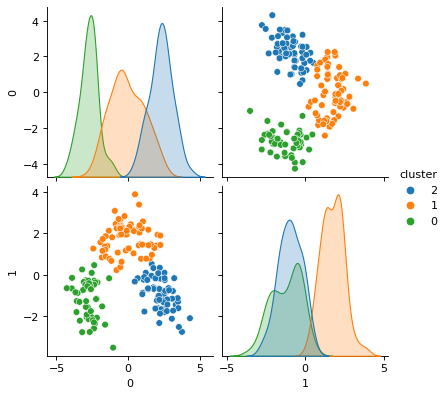

In [79]:
pca1['cluster'] = label4.astype(str)
sns_plot = sns.pairplot(pca1, hue = "cluster")

## Performance Evaluation

### Silhouette score for evaluation

Silhouette score of cluster by KM: 0.30068702916245316
Silhouette score of cluster by KM+PCA: 0.2958778351947876
Silhouette score of cluster by GMM: 0.2994341526110923
Silhouette score of cluster by GMM+PCA: 0.29634717769097507


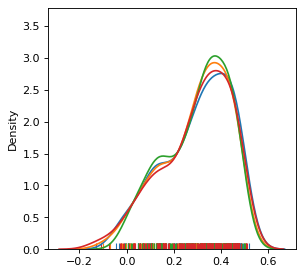

In [80]:
score1 = silhouette_score(wine_scaled, labels)
print("Silhouette score of cluster by KM:",score1)
scores1 = silhouette_samples(wine_scaled, labels)
p1=sns.distplot(scores1, hist=False, rug=True,label = 'KM');

score2 = silhouette_score(wine_scaled, label1)
print("Silhouette score of cluster by KM+PCA:",score2)
scores2 = silhouette_samples(wine_scaled, label1)
p2=sns.distplot(scores2, hist=False, rug=True, label = 'KM+PCA');

score3 = silhouette_score(wine_scaled, labels2)
print("Silhouette score of cluster by GMM:",score3)
scores3 = silhouette_samples(wine_scaled, labels2)
p3=sns.distplot(scores3, hist=False, rug=True, label = 'GMM');

score4 = silhouette_score(wine_scaled, label2)
print("Silhouette score of cluster by GMM+PCA:",score4)
scores4 = silhouette_samples(wine_scaled, label2)
p4=sns.distplot(scores4, hist=False, rug=True, label = 'GMM+PCA');

### Adjusted Rand Index

In [81]:
score1 = adjusted_rand_score(label, labels)
print("Adjusted Rand Index of KMeans algorithm:",score1)

score2= adjusted_rand_score(label, label1)
print("Adjusted Rand Index of KMeans with PCA:",score2)

score3 = adjusted_rand_score(label, labels2)
print("Adjusted Rand Index of GMM algorithm:",score3)

score4 = adjusted_rand_score(label, label2)
print("Adjusted Rand Index of GMM with PCA:",score4)

Adjusted Rand Index of KMeans algorithm: 0.9148795960669529
Adjusted Rand Index of KMeans with PCA: 0.8950582389649661
Adjusted Rand Index of GMM algorithm: 0.8803997758776985
Adjusted Rand Index of GMM with PCA: 0.9135013666962891


### Mutual Information Score

In [82]:
from sklearn.metrics.cluster import mutual_info_score

score1 = mutual_info_score(label, labels)
print("Mutual Information Score of KMeans algorithm:",score1)

score2= mutual_info_score(label, label1)
print("Mutual Information Score of KMeans with PCA:",score2)

score3 = mutual_info_score(label, labels2)
print("Mutual Information Score of GMM algorithm:",score3)

score4 = mutual_info_score(label, label2)
print("Mutual Information Score of GMM with PCA:",score4)

Mutual Information Score of KMeans algorithm: 0.9724883085711757
Mutual Information Score of KMeans with PCA: 0.9600375185493739
Mutual Information Score of GMM algorithm: 0.9382450559603059
Mutual Information Score of GMM with PCA: 0.9619675699758483
